In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:

class DeBruijn:
    def __init__(self,):
        self.kmers = [] 
        self.nodes = set()
        self.edges = {}
        self.eulerian = []
    def Graph(self,string,k):
        for i in range(len(string) - k + 1):
            ''' k-1 mers overlap '''
            l = string[i:i+k-1]
            r = string[i+1:i+k]
            self.nodes.add(l)
            self.nodes.add(r)
            if l not in self.edges.keys():
                self.edges[l] = [] 
            self.edges[l].append(r)
        file = open('DeBruijn.txt','w')
        file.write('\n'.join([f"{k} -> {','.join(v)}" for k,v in self.edges.items()]))
        file.close()
    def Graph_fromfile(self,file):
        file = open(file,'r')
        lines = file.read().splitlines()
        k = int(lines[0])
        seq = lines[1]
        return self.Graph(seq,k)
    def Graph_fromkmers(self,kmers,k):
        self.kmers = kmers
        for mer in self.kmers:
            l = mer[:-1]
            r = mer[1:]
            if l[1:] == r[:-1]:
                if l not in self.edges.keys():
                    self.edges[l] = [] 
            self.nodes.add(l)
            self.nodes.add(r)
            self.edges[l].append(r)
        return     
    def Graph_fromkmers_file(self,file):
        f = open(file,'r')
        lines = f.read().splitlines()
        mers = lines[1:]
        k = int(lines[0])
        return self.Graph_fromkmers(mers,k)
    def find_eulerian_path(self):
        g = nx.DiGraph(self.edges)
        plt.figure(figsize=(20,10))
        nx.draw_networkx(g, with_labels = True,node_color = 'skyblue',font_color='darkblue')
        eulerian_path = list(nx.algorithms.euler.eulerian_path(g))
        
        eulerian_ = [] 
        for i in eulerian_path:
            if i == eulerian_path[0]:
                eulerian_.append(i[0])
                eulerian_.append(i[1])
            else:
                eulerian_.append(i[1])
        self.eulerian = eulerian_
        return
    def text(self):
        string = ''
        list_ = self.eulerian
        for i in self.eulerian:
            if i == list_[0]: string += i
            else: string += i[-1]
        f = open('stringreconstruction.txt','w')
        f.write(string)
        f.close()
        return 


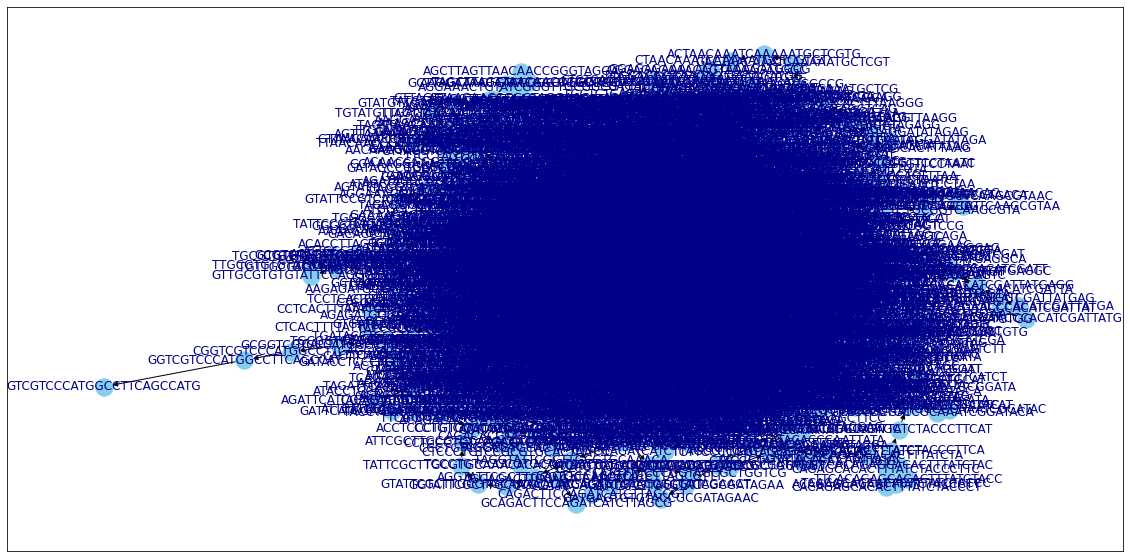

In [5]:
db = DeBruijn()
db.Graph_fromkmers_file(file = '/content/dataset_203_7.txt')
db.find_eulerian_path()
db.text()